<a href="https://colab.research.google.com/github/Mouhsine22/Houses-sales-forecasting/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Pipeline - Feature Engineering

## Reproducibility: Setting the seed

With the aim to ensure reproducibility between runs of the same notebook, but also between the research and production environment, for each step that includes some element of randomness, it is extremely important that we set the seed.

### Import the Importance libreries

In [ ]:
# to handel datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# for the yeo-johnson transformation
import scipy.stats as stats

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to save the trained scaler class
import joblib

# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

### Load the dataset

In [ ]:
# load dataset

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Training_projects/Houses_sales/datasets/train.csv')

# shape of data
print(data.shape)

# visualise the dataset
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Separate dataset into train and test

It is important to separate our data intro training and testing set.

When we engineer features, some techniques learn parameters from data. It is important to learn these parameters only from the train set. This is to avoid over-fitting.

Our feature engineering techniques will learn:

* mean
* mode
* exponents for the yeo-johnson
* category frequency
* and category to number mappings

from the train set.

**Separating the data into train and test involves randomness, therefore, we need to set the seed.**

In [ ]:
# Let's first select our indepedenet variables (x) and the target variable (y)
x = data.iloc[:, 1:-1]
y = data.iloc[:, -1:]

In [ ]:
# Let's separate into train and test set
# Remember to set seed (random_state for this sklearn function)

X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.25,
    random_state = 0 #seed
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1095, 79), (365, 79), (1095, 1), (365, 1))

## Feature Engineering

In the following cells, we will engineer the variables of the House Price Dataset so that we tackle:

* Missing values
* Temporal variables
* Non-Gaussian distributed variables
* Categorical variables: remove rare labels
* Categorical variables: convert strings to numbers
* Put the variables in a similar scale

### Target

we apply the logarithm

In [ ]:
y_train = np.log(y_train)
y_test = np.log(y_test)

### Missing values

#### Categorical variables

We will replace missing values with the string "missing" in thos variables with alot of missing data
Alternatively, we will replace missing data with the most frequent category in those variables that contain fewer observations without values.
This is common practice.

In [ ]:
# Let's identify the categorical variabels
# we will capture those of type object

cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# MSSubClass is also categorical by definition, despite its numeric values
# (you can find the definitions of the variables in the data_description.txt
# file available on Kaggle, in the same website where you downloaded the data)

# lets add MSSubClass to the list of categorical variables
cat_vars = cat_vars + ['MSSubClass']

# cast all variables as categorical
X_train[cat_vars] = X_train[cat_vars].astype('O')
X_test[cat_vars] = X_test[cat_vars].astype('O')

# number of categorical variables
len(cat_vars)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



44

In [ ]:
# make a list of the categorical variables that contain missing values

cat_vars_with_na = [
          var for var in cat_vars
          if X_train[var].isnull().sum() > 0
]

# print percentage of missing values per variable
(X_train[cat_vars_with_na].isnull().mean()*100).sort_values(ascending=False)

PoolQC          99.634703
MiscFeature     95.707763
Alley           94.063927
Fence           81.826484
FireplaceQu     47.579909
GarageCond       5.114155
GarageQual       5.114155
GarageFinish     5.114155
GarageType       5.114155
BsmtFinType2     2.374429
BsmtFinType1     2.283105
BsmtExposure     2.283105
BsmtCond         2.283105
BsmtQual         2.283105
MasVnrType       0.456621
Electrical       0.091324
dtype: float64

In [ ]:
# variables to impute with the string missing
with_string_missing = [
                       var for var in cat_vars_with_na if X_train[var].isnull().mean() > 0.1
]
# variables to impute with the most frequent category
with_frequent_category = [
                       var for var in cat_vars_with_na if X_train[var].isnull().mean() < 0.1
]

In [ ]:
with_string_missing

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [ ]:
with_frequent_category

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [ ]:
# replace missing values with new label: "Missing"
X_train[with_string_missing] = X_train[with_string_missing].fillna('Missing')
X_test[with_string_missing] = X_test[with_string_missing].fillna('Missing')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
for var in with_frequent_category:
  # there can ve tahn 1 mode in a variables
  # we take the first one with [0]
  mode = X_train[var].mode()[0]

  print(f'var : {var}, mode : {mode}')

  X_train[var].fillna(mode, inplace = True)
  X_test[var].fillna(mode, inplace = True)

var : MasVnrType, mode : None
var : BsmtQual, mode : TA
var : BsmtCond, mode : TA
var : BsmtExposure, mode : No
var : BsmtFinType1, mode : Unf
var : BsmtFinType2, mode : Unf
var : Electrical, mode : SBrkr
var : GarageType, mode : Attchd
var : GarageFinish, mode : Unf
var : GarageQual, mode : TA
var : GarageCond, mode : TA


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# check that we have no missing information in the engineered variables

X_train[cat_vars].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
MSSubClass       0
dtype: int64

### Numerical variables

To engineer missing values in numerical variables, we will:

* add a binary missing indicator variable
* and then replace the missing values in the original variable with the mean

In [ ]:
# now Let's identify the numerical variables 
num_vars = [
            var for var in X_train.columns if var not in cat_vars and var!= 'SalePrice'
]

# number of numerical variables
len(num_vars)

35

In [ ]:
# make a list of the numerical varables that contain missing values

vars_with_na = [
               var for var in num_vars if X_train[var].isnull().sum() > 0
]

X_train[vars_with_na].isnull().mean()

LotFrontage    0.181735
MasVnrArea     0.004566
GarageYrBlt    0.051142
dtype: float64

In [ ]:
# replacing missing values as we described above

for var in vars_with_na : 
  # calculate the mean using the train set
  mean_val = X_train[var].mean()

  print(var, mean_val)

  #adding binary missing indicator (in train and test)
  X_train[var+ '_na'] = np.where(X_train[var].isnull(), 1, 0)
  X_test[var+ '_na'] = np.where(X_test[var].isnull(), 1, 0)

  # replace missing values by the mean
  X_train[var].fillna(mean_val, inplace = True)
  X_test[var].fillna(mean_val, inplace = True)

# check that we have no more missing values in the engineered variables
X_train[vars_with_na].isnull().sum()

LotFrontage 69.76450892857143
MasVnrArea 104.24403669724771
GarageYrBlt 1978.0943214629451


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [ ]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
1292,70,RM,60.000000,6600,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,4,1892,1965,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Stone,TA,TA,No,Unf,0,Unf,0,994,994,GasA,TA,N,SBrkr,1378,994,0,2372,0,0,2,0,4,2,TA,11,Min2,0,Missing,Attchd,1985.0,RFn,1,432,TA,TA,Y,0,287,0,0,0,0,Missing,Missing,Missing,0,12,2009,WD,Normal,0,0,0
1018,80,RL,69.764509,10784,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,1991,1992,Gable,CompShg,HdBoard,HdBoard,BrkFace,76.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,SBrkr,802,670,0,1472,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1991.0,RFn,2,402,TA,TA,Y,164,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,1,0,0
1213,80,RL,69.764509,10246,Pave,Missing,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,4,9,1965,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,Gd,Av,GLQ,648,Unf,0,0,648,GasA,Ex,Y,SBrkr,960,0,0,960,1,1,0,0,0,1,TA,3,Typ,0,Missing,Attchd,1965.0,Unf,1,364,TA,TA,Y,88,0,0,0,0,0,Missing,Missing,Missing,0,5,2006,WD,Normal,1,0,0
1430,60,RL,60.000000,21930,Pave,Missing,IR3,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,Unf,0,Unf,0,732,732,GasA,Ex,Y,SBrkr,734,1104,0,1838,0,0,2,1,4,1,TA,7,Typ,1,Gd,BuiltIn,2005.0,Fin,2,372,TA,TA,Y,100,40,0,0,0,0,Missing,Missing,Missing,0,7,2006,WD,Normal,0,0,0
810,20,RL,78.000000,10140,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1974,1999,Hip,CompShg,HdBoard,HdBoard,BrkFace,99.0,TA,TA,CBlock,TA,TA,No,ALQ,663,LwQ,377,0,1040,GasA,Fa,Y,SBrkr,1309,0,0,1309,1,0,1,1,3,1,Gd,5,Typ,1,Fa,Attchd,1974.0,RFn,2,484,TA,TA,Y,265,0,0,0,0,648,Fa,GdPrv,Missing,0,1,2006,WD,Normal,0,0,0


### Temporal variables

Capture elapsed time

We learned in the previous notebook, that there are 4 variables that refer to the years in which the house or the garage were built or remodeled.

We will capture the time elapsed between those variables and the year in which the house was sold:

In [ ]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
  X_train[var] = X_train['YrSold'] - X_train[var]
  X_test[var] = X_test['YrSold'] - X_test[var]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# now we drop YrSold
X_train.drop(['YrSold'], axis=1, inplace=True)
X_test.drop(['YrSold'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X_train[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
1292,117,44,24.0
1018,16,15,16.0
1213,41,5,41.0
1430,1,1,1.0
810,32,7,32.0


In [ ]:
X_test[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
529,50,32,32.0
491,65,56,65.0
459,59,59,59.0
279,31,31,31.0
655,39,39,39.0


### Numerical variable transformation

#### Logarithmic transformation

In the previous notebook, we observed that the numerical variables are not normally distributed.

We will transform with the logarightm the positive numerical variables in order to get a more Gaussian-like distribution.

In [ ]:
for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
  X_train[var] = np.log(X_train[var])
  X_test[var] = np.log(X_test[var])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# check that test set does not contain null values in the engineered variables
[var for var in ["LotFrontage", "1stFlrSF", "GrLivArea"] if X_test[var].isnull().sum() > 0]

[]

In [ ]:
# same for train set
[var for var in ["LotFrontage", "1stFlrSF", "GrLivArea"] if X_train[var].isnull().sum() > 0]

[]

#### Yeo-Johnson transformation

We will apply the Yeo-Johnson transformation to LotArea.

In [ ]:
# the yeo-johnson transformation learns the best exponent to transform the variable
# it needs to learn it from the train set: 
X_train['LotArea'], param = stats.yeojohnson(X_train['LotArea'])

# and then apply the transformation to the test set with the same
# parameter: see who this time we pass param as argument to the 
# yeo-johnson
X_test['LotArea'] = stats.yeojohnson(X_test['LotArea'], lmbda=param)

print(param)

-10.040410040173137


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1478: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:2371: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1984: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1985: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a

In [ ]:
# check absence of na in the train set
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [ ]:
# check absence of na in the test set
[var for var in X_train.columns if X_test[var].isnull().sum() > 0]

[]

### Binarize skewed variables

There were a few variables very skewed, we would transform those into binary variables.

In [ ]:
skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

for var in skewed:
    
    # map the variable values into 0 and 1
    X_train[var] = np.where(X_train[var]==0, 0, 1)
    X_test[var] = np.where(X_test[var]==0, 0, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

### Categorical variables

#### Apply mappings
These are variables which values have an assigned order, related to quality. 

In [ ]:

# re-map strings to numbers, which determine quality

qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
    X_train[var] = X_train[var].map(qual_mappings)
    X_test[var] = X_test[var].map(qual_mappings)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

X_train[var] = X_train[var].map(garage_mappings)
X_test[var] = X_test[var].map(garage_mappings)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:

exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

var = 'BsmtExposure'

X_train[var] = X_train[var].map(exposure_mappings)
X_test[var] = X_test[var].map(exposure_mappings)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    X_train[var] = X_train[var].map(finish_mappings)
    X_test[var] = X_test[var].map(finish_mappings)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

X_train[var] = X_train[var].map(fence_mappings)
X_test[var] = X_test[var].map(fence_mappings)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# check absence of na in the train set
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

#### Removing Rare Labels
For the remaining categorical variables, we will group those categories that are present in less than 1% of the observations. That is, all values of categorical variables that are shared by less than 1% of houses, well be replaced by the string "Rare".

In [ ]:
# capture all quality variables

qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

# capture the remaining categorical variables
# (those that we did not re-map)

cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

30

In [ ]:
def find_frequent_labels(df, var, rare_perc):
    
    # function finds the labels that are shared by more than
    # a certain % of the houses in the dataset

    df = df.copy()

    tmp = df.groupby(var)[var].count() / len(df)

    return tmp[tmp > rare_perc].index


for var in cat_others:
    
    # find the frequent categories
    frequent_ls = find_frequent_labels(X_train, var, 0.01)
    
    print(var, frequent_ls)
    print()
    
    # replace rare categories by the string "Rare"
    X_train[var] = np.where(X_train[var].isin(
        frequent_ls), X_train[var], 'Rare')
    
    X_test[var] = np.where(X_test[var].isin(
        frequent_ls), X_test[var], 'Rare')

MSZoning Index(['FV', 'RH', 'RL', 'RM'], dtype='object', name='MSZoning')

Street Index(['Pave'], dtype='object', name='Street')

Alley Index(['Grvl', 'Missing', 'Pave'], dtype='object', name='Alley')

LotShape Index(['IR1', 'IR2', 'Reg'], dtype='object', name='LotShape')

LandContour Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object', name='LandContour')

Utilities Index(['AllPub'], dtype='object', name='Utilities')

LotConfig Index(['Corner', 'CulDSac', 'FR2', 'Inside'], dtype='object', name='LotConfig')

LandSlope Index(['Gtl', 'Mod', 'Sev'], dtype='object', name='LandSlope')

Neighborhood Index(['Blmngtn', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
       'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NWAmes',
       'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW',
       'Somerst', 'StoneBr', 'Timber'],
      dtype='object', name='Neighborhood')

Condition1 Index(['Artery', 'Feedr', 'Norm', 'PosN', 'RRAn'], dtype='object', name='Condition1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

#### Encoding of categorical variables
Next, we need to transform the strings of the categorical variables into numbers.

We will do it so that we capture the monotonic relationship between the label and the target.

In [ ]:
# this function will assign discrete values to the strings of the variables,
# so that the smaller value corresponds to the category that shows the smaller
# mean house sale price

def replace_categories(train, test, y_train, var, target):
    
    tmp = pd.concat([X_train, y_train], axis=1)
    
    # order the categories in a variable from that with the lowest
    # house sale price, to that with the highest
    ordered_labels = tmp.groupby([var])[target].mean().sort_values().index

    # create a dictionary of ordered categories to integer values
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}
    
    print(var, ordinal_label)
    print()

    # use the dictionary to replace the categorical strings by integers
    train[var] = train[var].map(ordinal_label)
    test[var] = test[var].map(ordinal_label)

In [ ]:
for var in cat_others:
    replace_categories(X_train, X_test, y_train, var, 'SalePrice')

MSZoning {'Rare': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}

Street {'Rare': 0, 'Pave': 1}

Alley {'Grvl': 0, 'Pave': 1, 'Missing': 2}

LotShape {'Reg': 0, 'IR1': 1, 'Rare': 2, 'IR2': 3}

LandContour {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}

Utilities {'Rare': 0, 'AllPub': 1}

LotConfig {'Rare': 0, 'Inside': 1, 'Corner': 2, 'FR2': 3, 'CulDSac': 4}

LandSlope {'Gtl': 0, 'Mod': 1, 'Sev': 2}

Neighborhood {'IDOTRR': 0, 'MeadowV': 1, 'BrDale': 2, 'BrkSide': 3, 'Edwards': 4, 'OldTown': 5, 'SWISU': 6, 'Sawyer': 7, 'NAmes': 8, 'Mitchel': 9, 'Rare': 10, 'SawyerW': 11, 'Gilbert': 12, 'NWAmes': 13, 'Blmngtn': 14, 'CollgCr': 15, 'ClearCr': 16, 'Crawfor': 17, 'Somerst': 18, 'Timber': 19, 'StoneBr': 20, 'NridgHt': 21, 'NoRidge': 22}

Condition1 {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRAn': 3, 'Rare': 4, 'PosN': 5}

Condition2 {'Rare': 0, 'Norm': 1}

BldgType {'2fmCon': 0, 'Twnhs': 1, 'Duplex': 2, 'TwnhsE': 3, '1Fam': 4}

HouseStyle {'1.5Unf': 0, '1.5Fin': 1, 'SFoyer': 2, 'SLvl': 3, '1Story': 4, 'Rare':

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy





PavedDrive {'N': 0, 'P': 1, 'Y': 2}

PoolQC {'Missing': 0, 'Rare': 1}

MiscFeature {'Rare': 0, 'Shed': 1, 'Missing': 2}

SaleType {'COD': 0, 'Rare': 1, 'WD': 2, 'New': 3}

SaleCondition {'Abnorml': 0, 'Rare': 1, 'Family': 2, 'Normal': 3, 'Partial': 4}

MSSubClass {30: 0, 45: 1, 190: 2, 'Rare': 3, 160: 4, 90: 5, 50: 6, 85: 7, 70: 8, 80: 9, 20: 10, 75: 11, 120: 12, 60: 13}



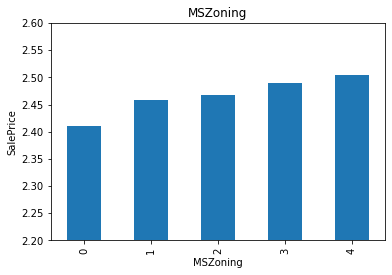

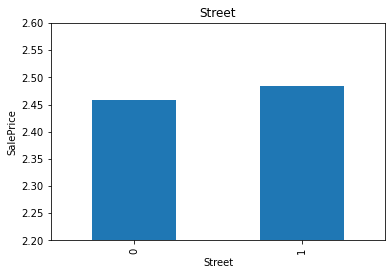

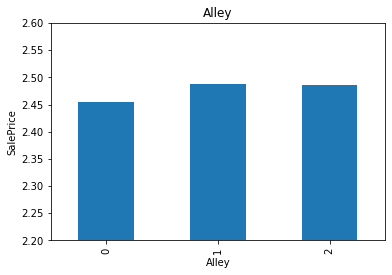

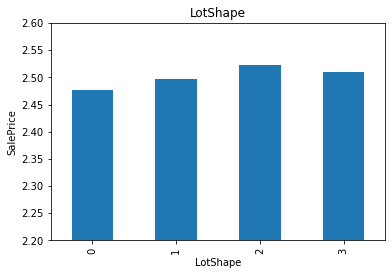

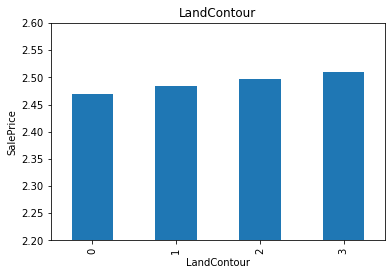

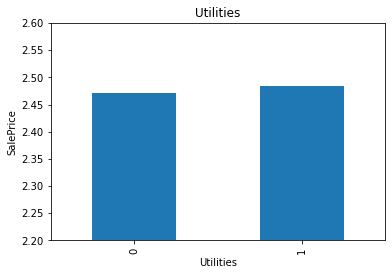

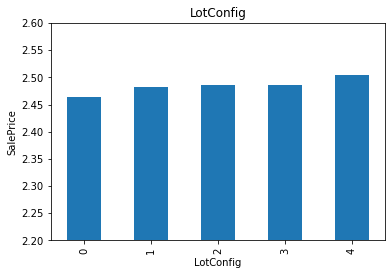

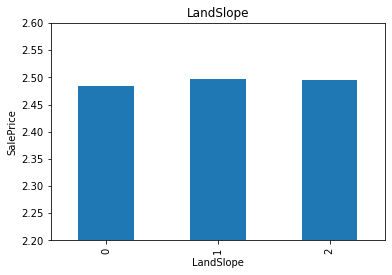

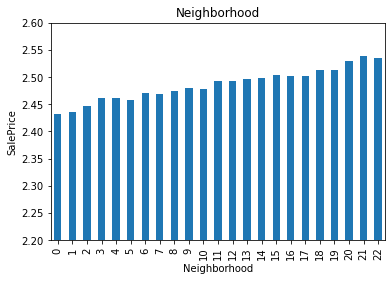

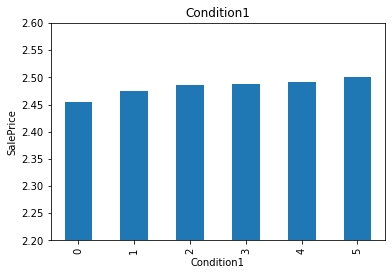

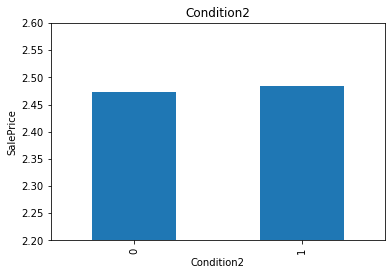

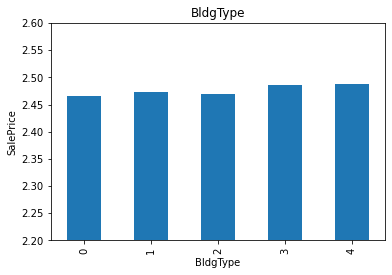

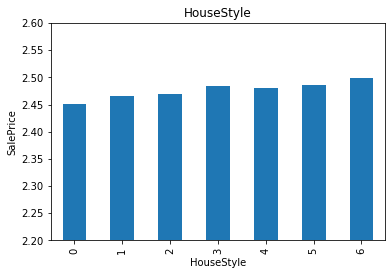

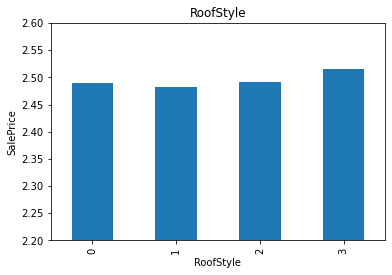

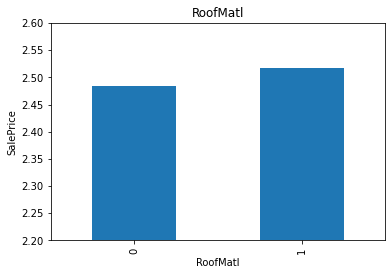

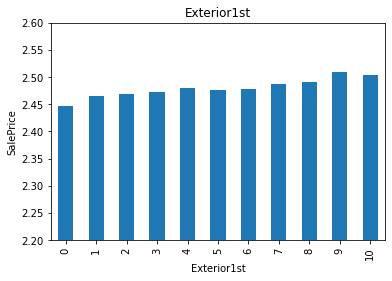

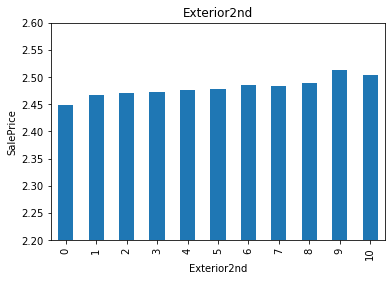

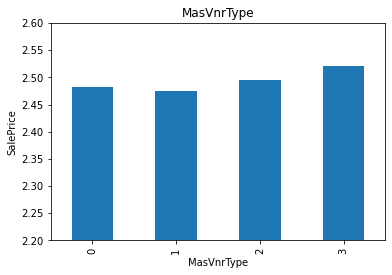

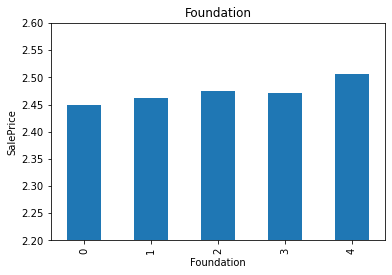

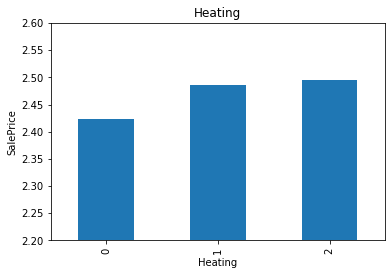

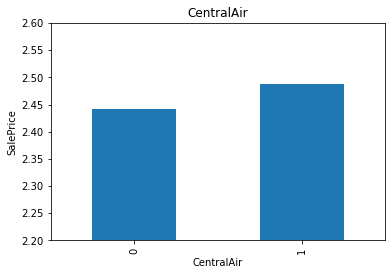

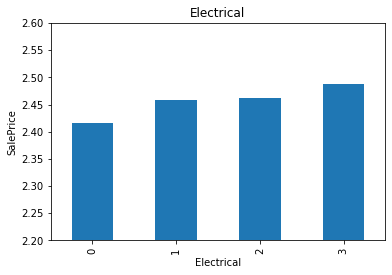

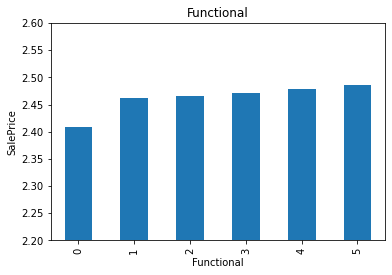

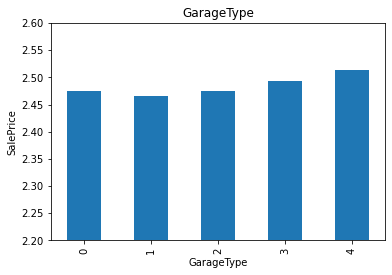

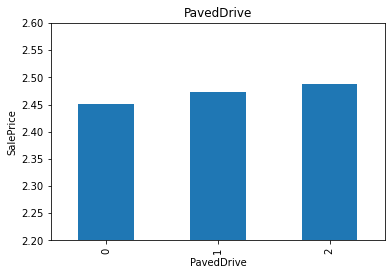

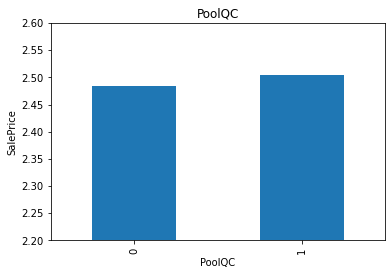

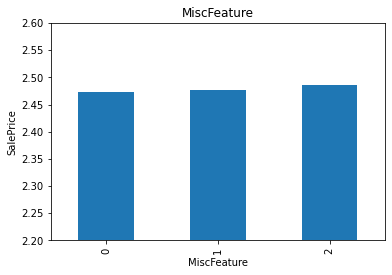

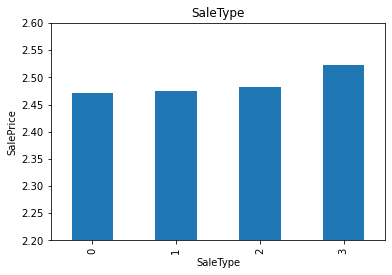

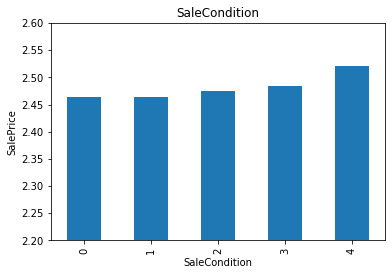

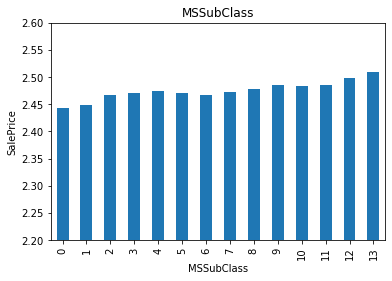

In [ ]:
# let me show you what I mean by monotonic relationship
# between labels and target

def analyse_vars(train, y_train, var):
    
    # function plots median house sale price per encoded
    # category
    
    tmp = pd.concat([X_train, np.log(y_train)], axis=1)
    
    tmp.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylim(2.2, 2.6)
    plt.ylabel('SalePrice')
    plt.show()
    
for var in cat_others:
    analyse_vars(X_train, y_train, var)

The monotonic relationship is particularly clear for the variables MSZoning and Neighborhood. Note how, the higher the integer that now represents the category, the higher the mean house sale price.

(remember that the target is log-transformed, that is why the differences seem so small).

#### Feature Scaling

For use in linear models, features need to be either scaled. We will scale features to the minimum and maximum values:

In [ ]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
1292,8,1,1.409607,0.099598,1,2,0,1,1,2,0,5,2,1,4,6,5,4,117,44,1,0,2,2,1,0.0,3,3,3,3,3,1,1,0,1,0,994,994,1,3,0,3,7.228388,994,0,7.771489,0,0,2,0,4,2,3,11,3,0,0,3,24.0,2,1,432,3,3,2,0,287,0,0,0,0,0,0,2,0,12,2,3,0,0,0
1018,9,3,1.445771,0.099598,1,2,1,1,1,3,0,12,2,1,4,3,7,5,16,15,1,0,5,5,2,76.0,4,3,4,4,3,1,1,0,1,0,384,384,1,4,1,3,6.687109,670,0,7.294377,0,0,2,1,3,1,4,7,5,1,3,3,16.0,2,2,402,3,3,2,164,0,0,0,0,0,0,0,2,0,5,2,3,1,0,0
1213,9,3,1.445771,0.099598,1,2,1,1,1,4,0,7,2,1,4,3,4,9,41,5,1,0,10,10,1,0.0,3,4,2,3,4,3,6,648,1,0,0,648,1,5,1,3,6.866933,0,0,6.866933,1,1,0,0,0,1,3,3,5,0,0,3,41.0,1,1,364,3,3,2,88,0,0,0,0,0,0,0,2,0,5,2,3,1,0,0
1430,13,3,1.409607,0.099598,1,2,2,1,1,1,0,12,3,1,4,6,5,5,1,1,1,0,10,10,1,0.0,4,3,4,4,4,3,1,0,1,0,732,732,1,5,1,3,6.598509,1104,0,7.516433,0,0,2,1,4,1,3,7,5,1,4,4,1.0,3,2,372,3,3,2,100,40,0,0,0,0,0,0,2,0,7,2,3,0,0,0
810,10,3,1.471717,0.099598,1,2,0,1,1,1,0,13,2,1,4,4,6,6,32,7,2,0,5,5,2,99.0,3,3,2,3,3,1,5,663,2,1,0,1040,1,2,1,3,7.177019,0,0,7.177019,1,0,1,1,3,1,4,5,5,1,2,3,32.0,2,2,484,3,3,2,265,0,0,0,0,648,1,4,2,0,1,2,3,0,0,0


In [ ]:
# create scaler
scaler = MinMaxScaler()

# fit the scaler to the train set
scaler.fit(X_train)

# transform the train and test set
X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns = X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)

In [ ]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.615385,0.25,0.466412,0.0,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.227273,0.4,1.0,1.0,1.000000,0.444444,0.375,0.860294,0.737705,0.333333,0.0,0.2,0.2,0.333333,0.000000,0.333333,0.50,0.75,0.333333,0.666667,0.000000,0.0,0.000000,0.0,0.0,0.461681,0.310044,0.5,0.50,0.0,1.0,0.624757,0.530983,0.0,0.742821,0.000000,0.0,0.666667,0.0,0.500,0.666667,0.333333,0.750000,0.6,0.000000,0.0,0.75,0.224299,0.5,0.25,0.310791,0.5,0.5,1.0,0.000000,0.524680,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,1.000000,0.666667,0.75,0.0,0.0,0.0
1,0.692308,0.75,0.523347,0.0,1.0,1.0,0.333333,0.333333,1.0,0.75,0.0,0.545455,0.4,1.0,1.0,0.500000,0.666667,0.500,0.117647,0.262295,0.333333,0.0,0.5,0.5,0.666667,0.047500,0.666667,0.50,1.00,0.666667,0.666667,0.000000,0.0,0.000000,0.0,0.0,0.178356,0.119775,0.5,0.75,1.0,1.0,0.386148,0.357906,0.0,0.562033,0.000000,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.6,0.75,0.149533,0.5,0.50,0.289209,0.5,0.5,1.0,0.222826,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.363636,0.666667,0.75,1.0,0.0,0.0
2,0.692308,0.75,0.523347,0.0,1.0,1.0,0.333333,0.333333,1.0,1.00,0.0,0.318182,0.4,1.0,1.0,0.500000,0.333333,1.000,0.301471,0.098361,0.333333,0.0,1.0,1.0,0.333333,0.000000,0.333333,0.75,0.50,0.333333,1.000000,0.666667,1.0,0.286726,0.0,0.0,0.000000,0.202121,0.5,1.00,1.0,1.0,0.465419,0.000000,0.0,0.400064,0.333333,0.5,0.000000,0.0,0.000,0.333333,0.333333,0.083333,1.0,0.000000,0.0,0.75,0.383178,0.0,0.25,0.261871,0.5,0.5,1.0,0.119565,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.363636,0.666667,0.75,1.0,0.0,0.0
3,1.000000,0.75,0.466412,0.0,1.0,1.0,0.666667,0.333333,1.0,0.25,0.0,0.545455,0.6,1.0,1.0,1.000000,0.444444,0.500,0.007353,0.032787,0.333333,0.0,1.0,1.0,0.333333,0.000000,0.666667,0.50,1.00,0.666667,1.000000,0.666667,0.0,0.000000,0.0,0.0,0.339991,0.228322,0.5,1.00,1.0,1.0,0.347091,0.589744,0.0,0.646175,0.000000,0.0,0.666667,0.5,0.500,0.333333,0.333333,0.416667,1.0,0.333333,0.8,1.00,0.009346,1.0,0.50,0.267626,0.5,0.5,1.0,0.135870,0.073126,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0
4,0.769231,0.75,0.564193,0.0,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.590909,0.4,1.0,1.0,0.666667,0.555556,0.625,0.235294,0.131148,0.666667,0.0,0.5,0.5,0.666667,0.061875,0.333333,0.50,0.50,0.333333,0.666667,0.000000,0.8,0.293363,0.2,1.0,0.000000,0.324392,0.5,0.25,1.0,1.0,0.602112,0.000000,0.0,0.517563,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.75,0.299065,0.5,0.50,0.348201,0.5,0.5,1.0,0.360054,0.000000,0.0,0.0,0.0,0.878049,1.0,1.0,1.0,0.0,0.000000,0.666667,0.75,0.0,0.0,0.0


In [ ]:
# let's now save the train and test sets for the next notebook!

X_train.to_csv('/content/drive/MyDrive/Colab Notebooks/Training_projects/Houses_sales/dataset_after_feature_eng/xtrain.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/Colab Notebooks/Training_projects/Houses_sales/dataset_after_feature_eng/xtest.csv', index=False)

y_train.to_csv('/content/drive/MyDrive/Colab Notebooks/Training_projects/Houses_sales/dataset_after_feature_eng/ytrain.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/Colab Notebooks/Training_projects/Houses_sales/dataset_after_feature_eng/ytest.csv', index=False)

In [ ]:
# now let's save the scaler

joblib.dump(scaler, '/content/drive/MyDrive/Colab Notebooks/Training_projects/Houses_sales/dataset_after_feature_eng/minmax_scaler.joblib')

['/content/drive/MyDrive/Colab Notebooks/Training_projects/Houses_sales/dataset_after_feature_eng/minmax_scaler.joblib']